In [138]:
import pandas as pd
import numpy as np
import datetime as datetime
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from pandas.api.types import is_string_dtype
#from pandas.api.types import is_numeric_dtype
pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
#pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 250) # to display all the columns
pd.set_option('display.max_rows', 250) # to display all the columns
#np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
warnings.filterwarnings('ignore')

In [139]:
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")

In [140]:
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [141]:
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [143]:
telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [144]:
telecom_churn_data.rename(columns={
                                   'jun_vbc_3g':'vbc_3g_6',
                                   'jul_vbc_3g':'vbc_3g_7',
                                   'aug_vbc_3g':'vbc_3g_8',
                                   'sep_vbc_3g':'vbc_3g_9',}, inplace=True)

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

In [176]:
def returncolumns(str):
    filter_col = [col for col in telecom_churn_data_highVal if str in col]
    return filter_col

In [208]:
print(returncolumns("av_rech"))
print(returncolumns("total_rech"))

['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']


In [209]:
telecom_churn_data[returncolumns("av_rech")] = telecom_churn_data[returncolumns("av_rech")].fillna(0, axis=1)
telecom_churn_data[returncolumns("total_rech")] = telecom_churn_data[returncolumns("total_rech")].fillna(0, axis=1)

In [210]:
telecom_churn_data['total_rech_amt_data_6'] = telecom_churn_data['av_rech_amt_data_6'] * telecom_churn_data['total_rech_data_6']
telecom_churn_data['total_rech_amt_data_7'] = telecom_churn_data['av_rech_amt_data_7'] * telecom_churn_data['total_rech_data_7']
telecom_churn_data['total_rech_amt_data_8'] = telecom_churn_data['av_rech_amt_data_8'] * telecom_churn_data['total_rech_data_8']
telecom_churn_data['total_rech_amt_data_9'] = telecom_churn_data['av_rech_amt_data_9'] * telecom_churn_data['total_rech_data_9']

In [211]:
telecom_churn_data_highVal = telecom_churn_data[
                    telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1) 
                  >= telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1).quantile(.70)]

In [212]:
telecom_churn_data_highVal

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,

In [214]:
telecom_churn_data_highVal_greater = telecom_churn_data[
                    round(telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1), 2) 
                  > round(telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1).quantile(.70),2)]

In [215]:
telecom_churn_data_highVal_greater

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,

In [216]:
round(telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']], 2).mean(axis=1) 

0        279.50
1        153.00
2        120.75
3        135.00
4        150.50
          ...  
99994     42.50
99995     55.00
99996     49.25
99997    801.00
99998    216.00
Length: 99999, dtype: float64

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [217]:
telecom_churn_data_highVal[['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74
...,...,...,...,...
99981,391.63,64.21,0.00,0.00
99984,149.26,14.44,723.41,232.56
99986,547.11,1095.24,9.14,941.48
99988,265.84,182.16,0.05,393.34


In [218]:
def defineChurn(row):
    if row['total_ic_mou_9'] + row['total_og_mou_9'] + row['vol_2g_mb_9'] + row['vol_3g_mb_9'] > 0.0000 :
        return 0
    else:
        return 1

In [219]:
telecom_churn_data_highVal['churn'] = telecom_churn_data_highVal.apply (lambda row: defineChurn(row), axis=1)

In [220]:
telecom_churn_data_highVal['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

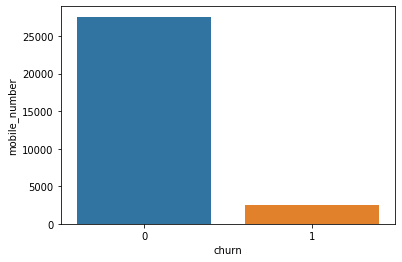

In [221]:
a = telecom_churn_data_highVal.groupby(['churn']).agg({'mobile_number':'count'}).reset_index()
sns.barplot(x=a['churn'], y=a['mobile_number'], data=a)

In [222]:
telecom_churn_data_highVal_greater['churn'] = telecom_churn_data_highVal_greater.apply (lambda row: defineChurn(row), axis=1)

In [223]:
telecom_churn_data_highVal_greater['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [224]:
columns_to_drop = list(filter(lambda x: (x.endswith('_9')), telecom_churn_data_highVal.columns))

In [225]:
telecom_churn_data_highVal_greater=telecom_churn_data_highVal_greater.drop(columns_to_drop, axis=1)

In [226]:
telecom_churn_data_highVal=telecom_churn_data_highVal.drop(columns_to_drop, axis=1)

In [227]:
telecom_churn_data_highVal.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'churn'],
      dtype='object', length=175)

In [228]:
telecom_churn_data_highVal.shape

(30001, 175)

Drop the columns that has only one value in the columns 

In [229]:
unique_var_cols = []
for col in telecom_churn_data_highVal:
    if(len(telecom_churn_data_highVal.loc[:,col].dropna().unique()) == 1):
        unique_var_cols.append(col)
print(unique_var_cols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [230]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(unique_var_cols, axis=1)

In [231]:
telecom_churn_data_highVal.shape

(30001, 162)

telecom_churn_data_highVal.to_csv(r'telecom_churn_data_highVal.csv', index = False, header=True)

Let's look at the date columns that we have here 

In [232]:
for i in returncolumns("date"):
    print(i)
    print(telecom_churn_data_highVal[i].unique())

date_of_last_rech_6
['6/21/2014' '6/27/2014' '6/25/2014' '6/30/2014' '6/18/2014' '6/24/2014'
 '6/29/2014' '6/28/2014' '6/17/2014' nan '6/20/2014' '6/22/2014'
 '6/13/2014' '6/26/2014' '6/16/2014' '6/12/2014' '6/15/2014' '6/7/2014'
 '6/14/2014' '6/8/2014' '6/23/2014' '6/19/2014' '6/2/2014' '6/4/2014'
 '6/6/2014' '6/10/2014' '6/5/2014' '6/11/2014' '6/9/2014' '6/1/2014'
 '6/3/2014']
date_of_last_rech_7
['7/16/2014' '7/25/2014' '7/31/2014' '7/7/2014' '7/30/2014' '7/28/2014'
 '7/22/2014' '7/23/2014' '7/26/2014' '7/29/2014' '7/27/2014' '7/19/2014'
 '7/20/2014' '7/24/2014' '7/15/2014' '7/9/2014' '7/13/2014' '7/21/2014'
 nan '7/5/2014' '7/18/2014' '7/17/2014' '7/12/2014' '7/4/2014' '7/10/2014'
 '7/1/2014' '7/6/2014' '7/11/2014' '7/14/2014' '7/8/2014' '7/3/2014'
 '7/2/2014']
date_of_last_rech_8
['8/8/2014' '8/26/2014' '8/30/2014' '8/31/2014' '8/24/2014' '8/28/2014'
 '8/23/2014' '8/2/2014' '8/27/2014' '8/21/2014' '8/29/2014' '8/25/2014'
 '8/17/2014' '8/22/2014' '8/19/2014' nan '8/15/2014' '8/9/20

As we could see that monthly wise date column serves no purpose for the further analysis and hence we are removing them from the data set

In [233]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(returncolumns("date"), axis=1)

In [234]:
telecom_churn_data_highVal.shape

(30001, 156)

As the below columns are created to identify the High-value customers, and we have the data with the avg column, we can drop these columns which are not necessary

In [235]:
returncolumns("total_rech_amt_data")

['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8']

In [236]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(returncolumns("total_rech_amt_data"), axis=1)

Let's look at the user related columns and it's unique values
 - There are records with nan which we are not aware whether the user has opted for the pack or not, let's create a new category -1 and fill in the missing values section

In [237]:
for i in returncolumns("user"):
    print(i)
    print(telecom_churn_data_highVal[i].unique())

night_pck_user_6
[ 0. nan  1.]
night_pck_user_7
[ 0. nan  1.]
night_pck_user_8
[ 0. nan  1.]
fb_user_6
[ 1. nan  0.]
fb_user_7
[ 1. nan  0.]
fb_user_8
[ 1. nan  0.]


Fill the missing values

In [249]:
missing_col_per = (round(100 * (telecom_churn_data_highVal.isnull().sum() /  telecom_churn_data_highVal.shape[0]),2))
missing_col_df = pd.DataFrame({'column_name': telecom_churn_data_highVal.columns,'missing_percent':missing_col_per}).reset_index(drop=True)
missing_col_df[missing_col_df['missing_percent'] > 0]

,column_name,missing_percent
4,onnet_mou_6,1.82
5,onnet_mou_7,1.79
6,onnet_mou_8,3.91
7,offnet_mou_6,1.82
8,offnet_mou_7,1.79
9,offnet_mou_8,3.91
10,roam_ic_mou_6,1.82
11,roam_ic_mou_7,1.79
12,roam_ic_mou_8,3.91
13,roam_og_mou_6,1.82


In [239]:
telecom_churn_data_highVal[returncolumns("user")] = telecom_churn_data_highVal[returncolumns("user")].fillna(-1, axis=1)

In [240]:
for i in returncolumns("user"):
    print(i)
    print(telecom_churn_data_highVal[i].unique())

night_pck_user_6
[ 0. -1.  1.]
night_pck_user_7
[ 0. -1.  1.]
night_pck_user_8
[ 0. -1.  1.]
fb_user_6
[ 1. -1.  0.]
fb_user_7
[ 1. -1.  0.]
fb_user_8
[ 1. -1.  0.]


In [241]:
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['count_rech_2g_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['count_rech_3g_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['count_rech_2g_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['count_rech_3g_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['count_rech_2g_8'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['count_rech_3g_8'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['av_rech_amt_data_8'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[0.]


Fill with respect to the total_data_rech values is zero
 - From the above analysis we can directly fill the count of 2g and 3g recharges to zero as we can see whenever the total recharges are zero it has unique value as nan
 - For all the total number of recharges are zero for 8th Month and hence average_rech_amt_data_8 should also be filled with zero

In [242]:
returncolumns("count_rech")

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8']

In [243]:
telecom_churn_data_highVal[returncolumns("count_rech")] = telecom_churn_data_highVal[returncolumns("count_rech")].fillna(0, axis=1)

In [245]:
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['max_rech_data_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['max_rech_data_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['max_rech_data_8'].unique())

[nan]
[nan]
[nan]


In [247]:
returncolumns("max_rech_data")

['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [248]:
telecom_churn_data_highVal[returncolumns("max_rech_data")] = telecom_churn_data_highVal[returncolumns("max_rech_data")].fillna(0, axis=1)

As most of the columns which has high % missing values are filled with respect to the reasons above, we can also fill the remaining with lesser percentage of values also with zero

In [270]:
telecom_churn_data_highVal[np.array(missing_col_df[missing_col_df['missing_percent'] > 0]['column_name'])] = telecom_churn_data_highVal[np.array(missing_col_df[missing_col_df['missing_percent'] > 0]['column_name'])].fillna(0, axis=1)

In [271]:
missing_col_per = (round(100 * (telecom_churn_data_highVal.isnull().sum() /  telecom_churn_data_highVal.shape[0]),2))
missing_col_df = pd.DataFrame({'column_name': telecom_churn_data_highVal.columns,'missing_percent':missing_col_per}).reset_index(drop=True)
missing_col_df[missing_col_df['missing_percent'] > 0]

,column_name,missing_percent


In [273]:
telecom_churn_data_highVal.shape

(30001, 153)

### Univariate, Bivariate Analysis and Derived Features

##### Trend of the Total Amount recharged by the customers

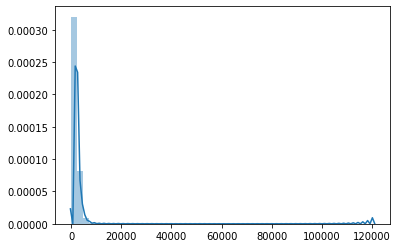

In [327]:
sns.distplot((telecom_churn_data_highVal['total_rech_amt_6']+telecom_churn_data_highVal['total_rech_amt_7']+telecom_churn_data_highVal['total_rech_amt_8']))

##### Trend with respect to the calls made with in the network

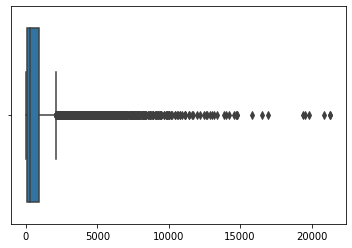

In [328]:
sns.boxplot((telecom_churn_data_highVal['onnet_mou_6']+telecom_churn_data_highVal['onnet_mou_7']+telecom_churn_data_highVal['onnet_mou_8']))

##### Trend with respect to the total minutes used for the outgoing

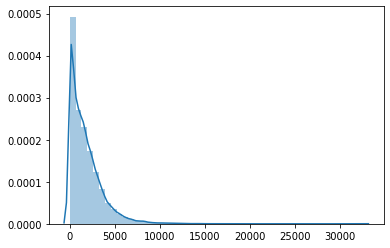

In [329]:
sns.distplot(telecom_churn_data_highVal['total_og_mou_6']+telecom_churn_data_highVal['total_og_mou_7']+telecom_churn_data_highVal['total_og_mou_8'])

#####  Trend with respect to the number of recharges made for the 2g and 3g by the customers for the data

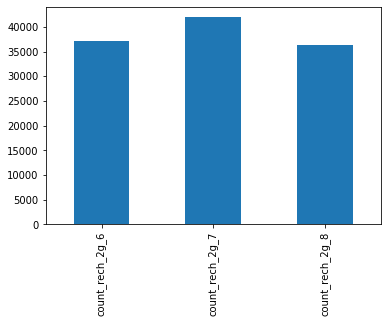

In [330]:
(telecom_churn_data_highVal[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']].sum()).plot(kind='bar')

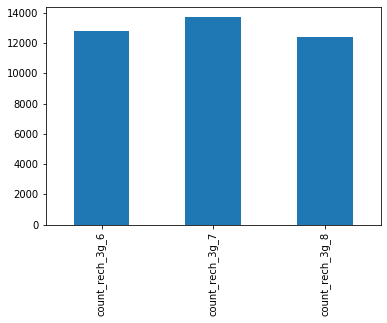

In [331]:
(telecom_churn_data_highVal[['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']].sum()).plot(kind='bar')

##### Trend of the outgoing calls per month with respect to churned and Non-churned customers
As we can see there is a drop in the outgoing of the customer calls month by month

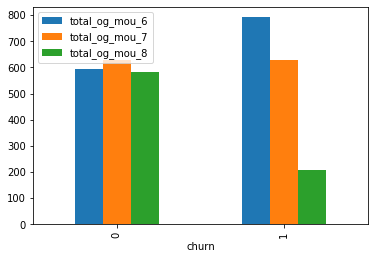

In [334]:
telecom_churn_data_highVal.groupby('churn')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean().plot(kind='bar')

##### Trend of the incoming calls per month with respect to churned and Non-churned customers
As we can see there is a drop in the incoming of the customer calls month by month

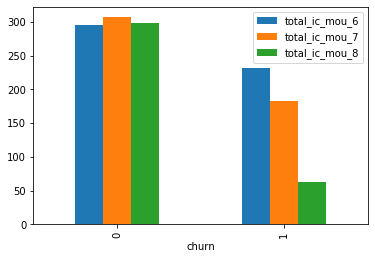

In [335]:
telecom_churn_data_highVal.groupby('churn')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean().plot(kind='bar')

##### Trend with respect to the amount of recharges done by the customers monthwise

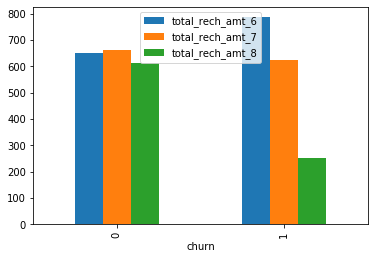

In [336]:
telecom_churn_data_highVal.groupby('churn')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().plot(kind='bar')

##### Trend with respect to the std outgoing calls made by the churn and Non-Churn Customers

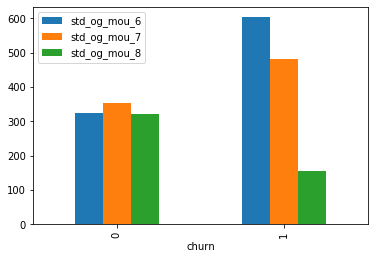

In [342]:
telecom_churn_data_highVal.groupby('churn')['std_og_mou_6','std_og_mou_7','std_og_mou_8'].mean().plot(kind='bar')

##### Trend with respect to the local outgoing calls made by the churn and Non-Churn Customers

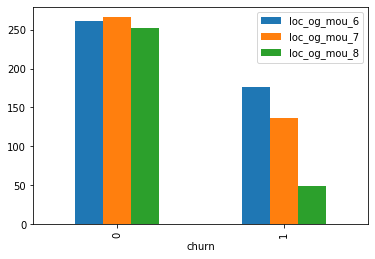

In [343]:
telecom_churn_data_highVal.groupby('churn')['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'].mean().plot(kind='bar')

##### 2G and 3G data volume usage trends with respect to the monthwise by the churned and non-churned customers

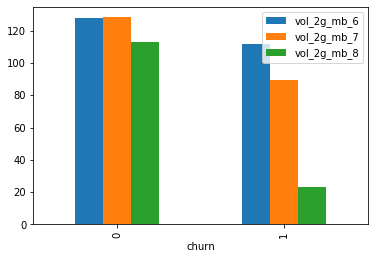

In [345]:
telecom_churn_data_highVal.groupby('churn')['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean().plot(kind='bar')

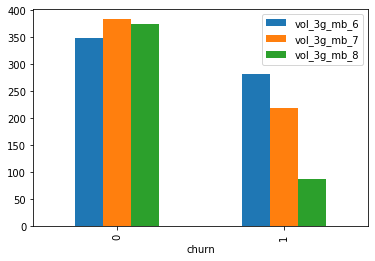

In [346]:
telecom_churn_data_highVal.groupby('churn')['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean().plot(kind='bar')

##### Trend of the calls made to the customer care month wise by the churned and non-churned users

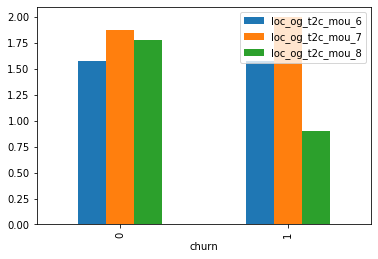

In [351]:
telecom_churn_data_highVal.groupby('churn')['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'].mean().plot(kind='bar')

##### Monthwise Average Revenue Trend with respect to the churned and non-churned customers

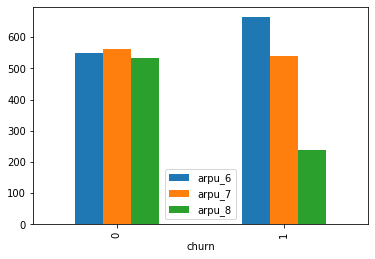

In [352]:
telecom_churn_data_highVal.groupby('churn')['arpu_6','arpu_7','arpu_8'].mean().plot(kind='bar')

##### Create Bins for Age on Network

In [279]:
telecom_churn_data_highVal['aon'].describe()
bins_2 = [0,900,1800,2700, 3600, 4500]
slot_2 = ['0-900','900-1800','1800-2700','2700-3600','3600-4500']
telecom_churn_data_highVal['aon_range'] = pd.cut(telecom_churn_data_highVal['aon'], bins_2, labels=slot_2)

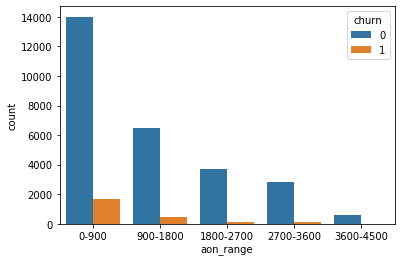

In [337]:
sns.countplot(data =telecom_churn_data_highVal, x='aon_range', hue='churn')
plt.show()

##### Trend of churn and Non-Churn customers with respect to the Age on the Network
We can clearly see that whose Age on network is less there are high chances of being churned

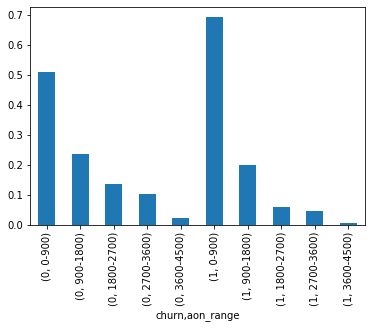

In [341]:
(telecom_churn_data_highVal.groupby(['churn','aon_range'])['aon_range'].count()/telecom_churn_data_highVal.groupby('churn')['aon_range'].count()).plot(kind='bar')

##### Trend based on the outgoing calls usage wise plotting
As we can see that the customers who are making std calls are having high churn ratio as when compared to local calls.

In [348]:
def usagestdorlocal(row):
    if ((row['loc_og_mou_6']+row['loc_og_mou_7']+row['loc_og_mou_8'] > row['std_og_mou_6']+row['std_og_mou_7']+row['std_og_mou_8'])):
        return "loc"
    else:
        return "std"

In [349]:
telecom_churn_data_highVal['usage_loc_std'] = telecom_churn_data_highVal.apply(lambda row: usagestdorlocal(row), axis=1)

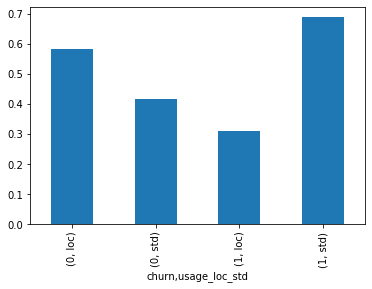

In [350]:
(telecom_churn_data_highVal.groupby(['churn','usage_loc_std'])['usage_loc_std'].count()/telecom_churn_data_highVal.groupby('churn')['usage_loc_std'].count()).plot(kind='bar')

##### Monthwise per recharge Amount
 - As we see the trend with respect to churn users, the per recharge amount is gradually decreasing month by month.

In [290]:
telecom_churn_data_highVal['amt_per_rech_6'] = ((telecom_churn_data_highVal['total_rech_amt_6']/telecom_churn_data_highVal['total_rech_num_6']) + telecom_churn_data_highVal['av_rech_amt_data_6'])/2
telecom_churn_data_highVal['amt_per_rech_7'] = ((telecom_churn_data_highVal['total_rech_amt_7']/telecom_churn_data_highVal['total_rech_num_7']) + telecom_churn_data_highVal['av_rech_amt_data_7'])/2
telecom_churn_data_highVal['amt_per_rech_8'] = ((telecom_churn_data_highVal['total_rech_amt_8']/telecom_churn_data_highVal['total_rech_num_8']) + telecom_churn_data_highVal['av_rech_amt_data_8'])/2

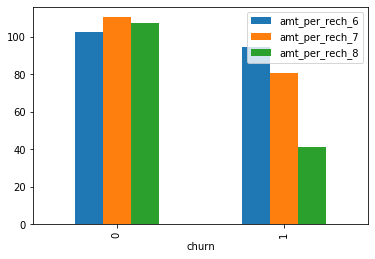

In [291]:
telecom_churn_data_highVal.groupby('churn')['amt_per_rech_6','amt_per_rech_7','amt_per_rech_8'].mean().plot(kind='bar')

In [312]:
def usageRatio(row):
    if ((row['total_og_mou_6'] + row['total_ic_mou_6'] + row['vol_2g_mb_6'] + row['vol_3g_mb_6'] + row['total_og_mou_7'] + row['total_ic_mou_7'] + row['vol_2g_mb_7'] + row['vol_3g_mb_7'])/2  > 
    (row['total_og_mou_8'] + row['total_ic_mou_8'] + row['vol_2g_mb_8'] + row['vol_3g_mb_8'])):
        return 1
    else:
        return 0
telecom_churn_data_highVal['usage_reduced'] = telecom_churn_data_highVal.apply(lambda row: usageRatio(row), axis=1)


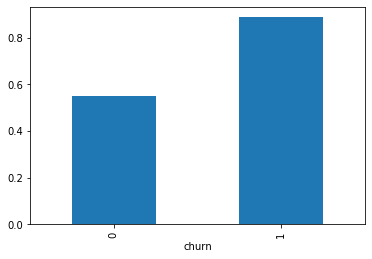

In [316]:
telecom_churn_data_highVal.groupby('churn')['usage_reduced'].mean().plot(kind="bar")

In [307]:
telecom_churn_data_highVal['usage_reduced'].value_counts()

0    17377
1    12624
Name: usage_reduced, dtype: int64

#### Negative Values Treatment

As we can see that average revenue columns has the negative values. This dataset is for the Prepaid and the revenue columns cannot be negative

In [353]:
telecom_churn_data_highVal.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,amt_per_rech_6,amt_per_rech_7,amt_per_rech_8,usage_reduced
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

In [357]:
telecom_churn_data_highVal[(telecom_churn_data_highVal['arpu_6'] < 0 )
                           | (telecom_churn_data_highVal['arpu_7'] < 0) 
                           | (telecom_churn_data_highVal['arpu_8'] < 0) ]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,aon_range,amt_per_rech_6,amt_per_rech_7,amt_per_rech_8,usage_reduced,usage_loc_std
588,7001967063,514.479,-2014.045,3269.790,1161.33,1384.58,1649.49,4129.68,4211.83,3695.91,0.00,0.00,0.00,0.00,0.00,0.00,277.11,346.96,499.56,1968.54,1932.11,1779.28,155.68,139.73,72.76,11.94,19.04,8.33,2401.34,2418.81,2351.61,884.21,1037.23,1149.93,1943.21,2104.64,1828.38,50.28,15.21,3.01,2877.71,3157.09,2981.33,0.00,1.45,0.00,11.94,19.04,12.76,0.00,0.00,0.0,5291.01,5596.41,5345.71,13.68,17.74,6.86,26.81,30.94,31.09,0.15,0.16,3.53,40.64,48.86,41.49,3.73,7.43,4.33,7.59,7.79,7.11,0.00,0.00,0.00,11.33,15.23,11.44,51.98,64.09,52.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,2,0,3011,5011,0,2010,4010,0,2010,4010,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,235,0.00,0.00,0.00,0,0-900,752.750000,1252.750000,NaN,1,std
687,7001662284,427.627,0.000,-5.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,1,0,504,0,0,252,0,0,252,0,0,2.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,504.0,0.0,0.0,9.42,0.00,0.00,1971.07,0.00,0.00,424.34,0.00,0.00,424.34,0.00,0.00,0.0,-1.0,-1.0,0,0,0,0,0,0,2,0,0,0,0,0,1.0,-1.0,-1.0,446,0.00,0.00,145.24,1,0-900,336.000000,0.000000,NaN,1,std
821,7000238486,-160.795,165.590,384.850,0.86,23.98,3.34,604.14,120.31,348.74,6.11,8.61,4.61,0.00,39.31,0.00,0.00,0.00,0.00,7.81,1

In [355]:
len(telecom_churn_data_highVal[(telecom_churn_data_highVal['arpu_3g_6'] < 0 )
                           | (telecom_churn_data_highVal['arpu_3g_7'] < 0) 
                           | (telecom_churn_data_highVal['arpu_3g_8'] < 0) ])

640

In [356]:
len(telecom_churn_data_highVal[(telecom_churn_data_highVal['arpu_2g_6'] < 0 )
                           | (telecom_churn_data_highVal['arpu_2g_7'] < 0) 
                           | (telecom_churn_data_highVal['arpu_2g_8'] < 0) ])

644

#### Outliers Treatment

In [317]:
returncolumns('t2c')

['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8']